In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model

import random
from random import randint

In [3]:
spotify = pd.read_csv("spotify-2023.csv", encoding='ISO-8859-1')
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


Number of Songs Released By Year

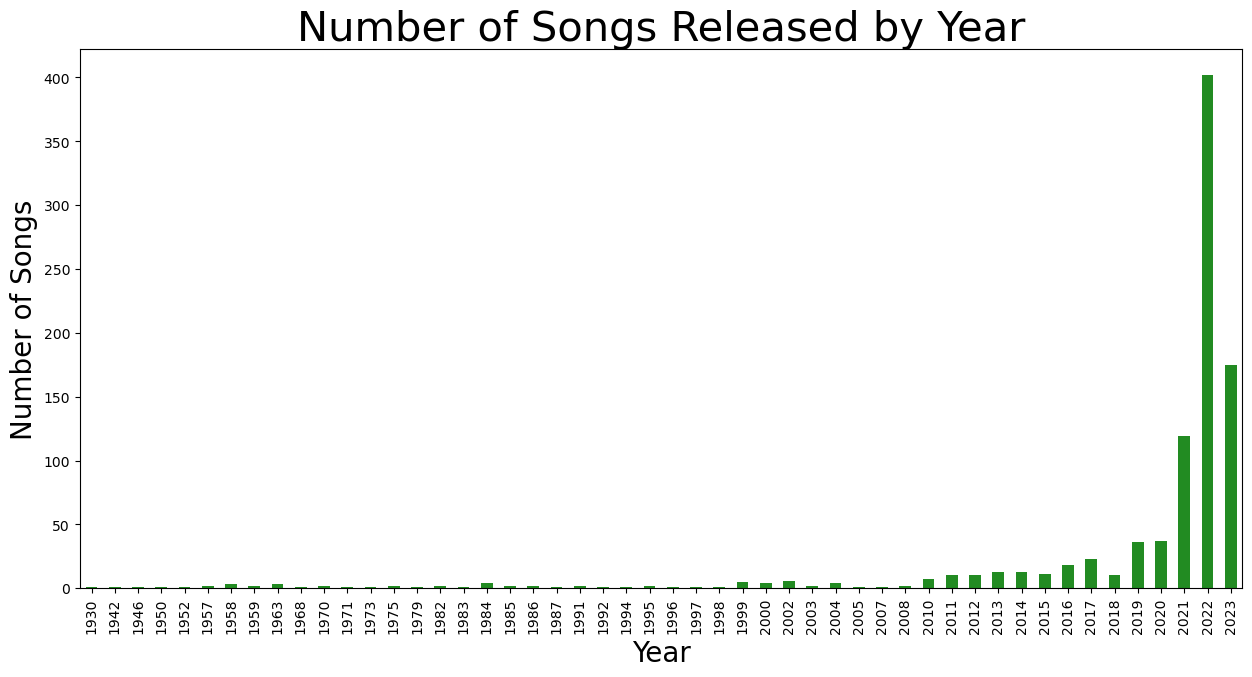

In [4]:
fig = plt.figure(figsize=(15, 7))
spotify.groupby('released_year')['track_name'].agg(len).plot(kind='bar', color='forestgreen')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Songs', fontsize=20)
plt.title('Number of Songs Released by Year', fontsize=30)
plt.show()

Analisis Jumlah Lagu dalam Playlist Spotify

Jumlah Lagu berdasarkan Bulan Rilis

Text(0.5, 1.0, 'Number of Songs Released by Month')

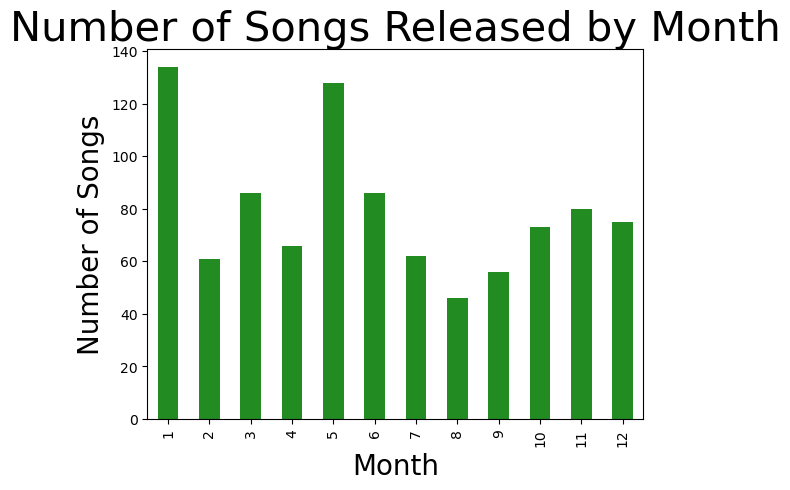

In [6]:
spotify.groupby('released_month')['track_name'].agg(len).plot(kind='bar', color='forestgreen')
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of Songs', fontsize=20)
plt.title('Number of Songs Released by Month', fontsize=30)


# Analisis Distribusi BPM

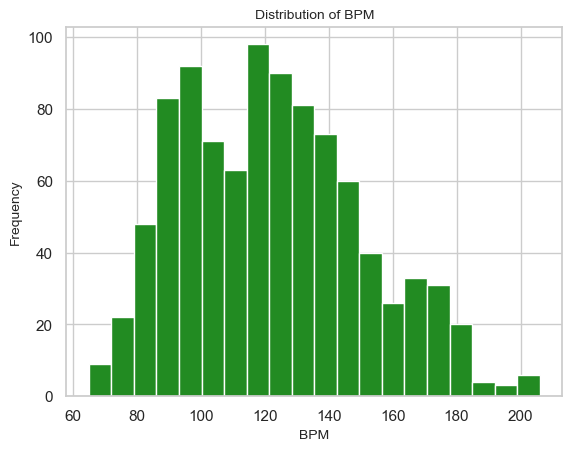

In [33]:
spotify['bpm'].plot(kind='hist', bins=20, color='forestgreen')
plt.xlabel('BPM', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Distribution of BPM', fontsize=10)
plt.savefig("plot.jpg", format="jpg")


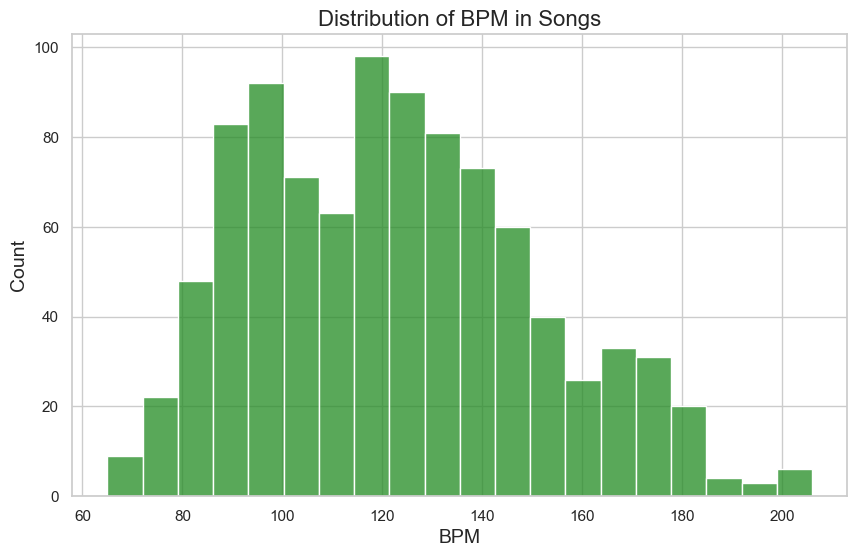

In [8]:
import seaborn as sns
# Mengatur gaya plot (opsional)
sns.set(style="whitegrid")

# Membuat histogram BPM
plt.figure(figsize=(10, 6))
sns.histplot(spotify['bpm'], bins=20, color='forestgreen')
plt.xlabel('BPM', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of BPM in Songs', fontsize=16)
plt.show()
plt.savefig("plot.jpg", format="jpg")


In [9]:
import numpy as np

# Membuat histogram BPM dan menyimpan data histogram
hist, bins = np.histogram(spotify['bpm'], bins=20)

# Menampilkan jumlah lagu dalam setiap bin
for i in range(len(hist)):
    print(f"Bin {i+1}: {hist[i]} lagu")


Bin 1: 9 lagu
Bin 2: 22 lagu
Bin 3: 48 lagu
Bin 4: 83 lagu
Bin 5: 92 lagu
Bin 6: 71 lagu
Bin 7: 63 lagu
Bin 8: 98 lagu
Bin 9: 90 lagu
Bin 10: 81 lagu
Bin 11: 73 lagu
Bin 12: 60 lagu
Bin 13: 40 lagu
Bin 14: 26 lagu
Bin 15: 33 lagu
Bin 16: 31 lagu
Bin 17: 20 lagu
Bin 18: 4 lagu
Bin 19: 3 lagu
Bin 20: 6 lagu


Analisis Jumlah Lagu dalam Playlist Spotify dan Apple Music


Text(0.5, 1.0, 'Number of Songs in Spotify and Apple Music Playlists')

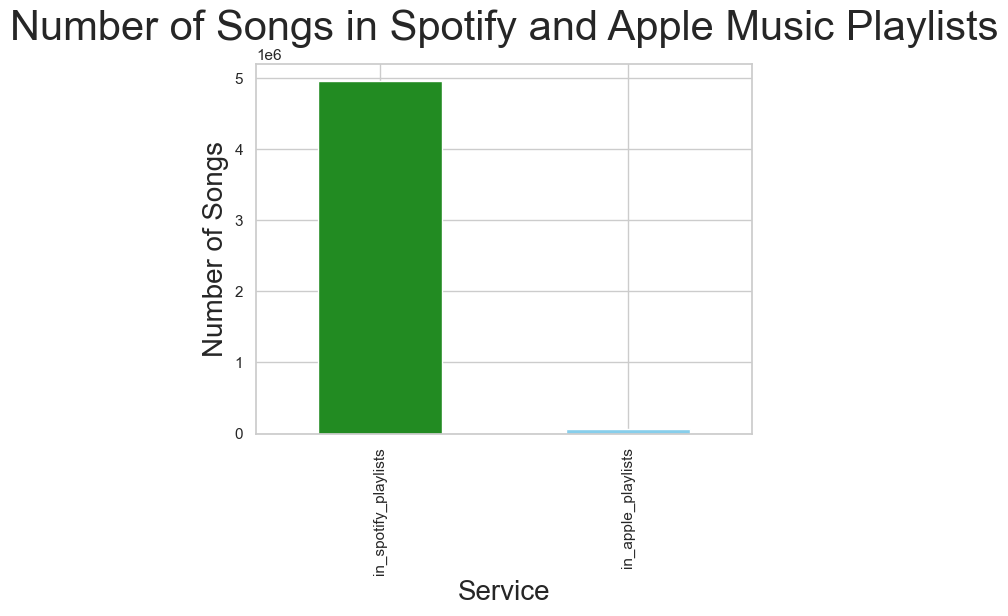

In [10]:
spotify[['in_spotify_playlists', 'in_apple_playlists']].sum().plot(kind='bar', color=['forestgreen', 'skyblue'])
plt.xlabel('Service', fontsize=20)
plt.ylabel('Number of Songs', fontsize=20)
plt.title('Number of Songs in Spotify and Apple Music Playlists', fontsize=30)


# Analisis Atribut Mode (Major atau Minor) dalam Lagu

1. Mode Major: Mode mayor umumnya dianggap ceria, bahagia, atau optimis. Ini sering digunakan dalam lagu-lagu yang memiliki nada-nada yang lebih cerah dan gembira. Dalam notasi musik, mode mayor umumnya dikaitkan dengan "I," yang merupakan akar (root) dari skala mayor.
2. Mode Minor: Mode minor umumnya dianggap lebih sedih, serius, atau misterius. Ini sering digunakan dalam lagu-lagu yang memiliki nada-nada yang lebih gelap atau melankolis. Dalam notasi musik, mode minor umumnya dikaitkan dengan "vi," yang merupakan akor minor dari skala mayor.

Text(0.5, 1.0, 'Distribution of Song Modes')

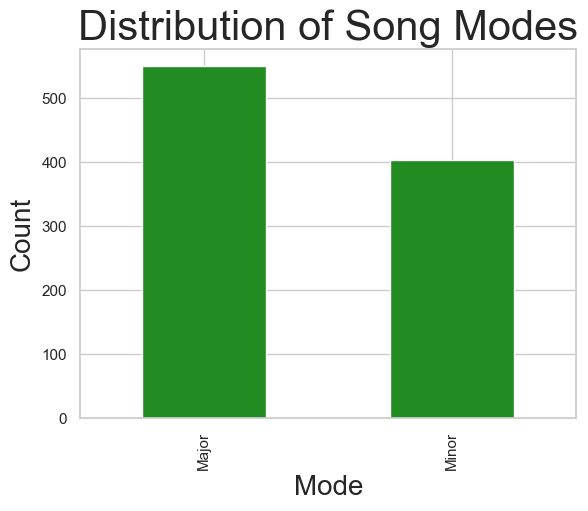

In [11]:
spotify['mode'].value_counts().plot(kind='bar', color='forestgreen')
plt.xlabel('Mode', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Distribution of Song Modes', fontsize=30)


In [12]:
df = pd.read_csv("spotify-2023.csv", encoding='ISO-8859-1')
print(df.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [14]:
df = df.rename(columns={'danceability_%': 'danceability',
                       'energy_%': 'energy',
                       'acousticness_%': 'acousticness',
                       'instrumentalness_%': 'instrumentalness',
                       'liveness_%': 'liveness',
                       'speechiness_%': 'speechiness'})

In [15]:
df = df.rename(columns={'valence_%': 'valence'})

In [16]:
track_names = df['track_name']

In [17]:
mean_bpm = df['bpm'].mean()

In [18]:
# untuk menyaring lagu dengan BPM di atas 130
high_bpm_songs = df[df['bpm'] > 130]

In [19]:
# Mengimpor pustaka Pandas
import pandas as pd

# Menghitung jumlah lagu dalam mode major dan minor
song_count_by_mode = df['mode'].value_counts()

# Menampilkan hasil
print(song_count_by_mode)


Major    550
Minor    403
Name: mode, dtype: int64


# Analisis Korelasi Antara Atribut MUsik

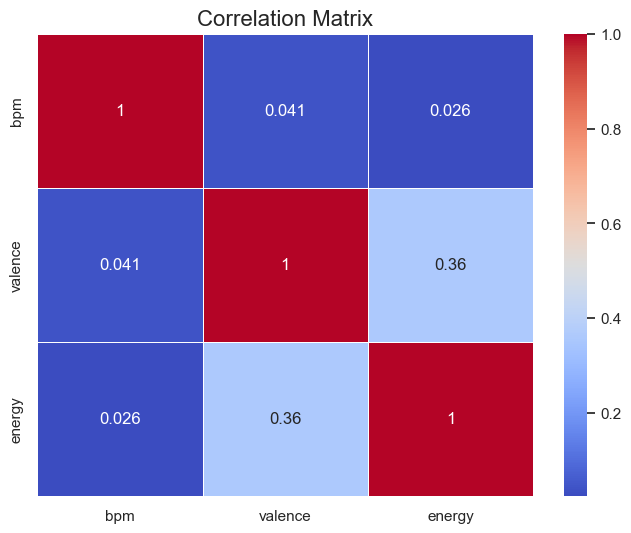

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Membuat matriks korelasi
correlation_matrix = df[['bpm', 'valence', 'energy']].corr()

# Membuat plot matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


# Analisis Danceability, Valence, dan Energy

In [21]:
# Mengganti 'data' dengan datasetmu

# Menampilkan lagu-lagu yang cocok untuk menari (danceability >= 0.8)
danceable_songs = df[df['danceability'] >= 80]
print(danceable_songs)


                              track_name         artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)       Latto, Jung Kook             2   
5                               Sprinter      Dave, Central Cee             2   
8                               fukumean                  Gunna             1   
9                        La Bebe - Remix  Peso Pluma, Yng Lvcas             2   
18                            Classy 101       Feid, Young Miko             2   
..                                   ...                    ...           ...   
935                                On BS       Drake, 21 Savage             2   
943                   Privileged Rappers       Drake, 21 Savage             2   
945                      BackOutsideBoyz                  Drake             1   
950                 A Veces (feat. Feid)     Feid, Paulo Londra             2   
951                        En La De Ella     Feid, Sech, Jhayco             3   

     released_year  release

In [22]:


# Menampilkan lagu-lagu dengan tingkat valence tinggi (valence >= 0.8)
positive_songs = df[df['valence'] >= 80]
print(positive_songs)


                                            track_name  \
0                  Seven (feat. Latto) (Explicit Ver.)   
6                                      Ella Baila Sola   
20                                           LADY GAGA   
21   I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...   
23            Peso Pluma: Bzrp Music Sessions, Vol. 55   
..                                                 ...   
896                                                JGL   
901                                         After LIKE   
924                            2 Be Loved (Am I Ready)   
929                          Bamba (feat. Aitch & BIA)   
950                               A Veces (feat. Feid)   

                               artist(s)_name  artist_count  released_year  \
0                            Latto, Jung Kook             2           2023   
6                  Eslabon Armado, Peso Pluma             2           2023   
20   Gabito Ballesteros, Junior H, Peso Pluma             3          

In [23]:

# Menampilkan lagu-lagu dengan tingkat energy tinggi (energy >= 0.8)
high_energy_songs = df[df['energy'] >= 80]
print(high_energy_songs)


                              track_name             artist(s)_name  \
0    Seven (feat. Latto) (Explicit Ver.)           Latto, Jung Kook   
4                         WHERE SHE GOES                  Bad Bunny   
11                             Super Shy                   NewJeans   
25                           SABOR FRESA              Fuerza Regida   
26         Calm Down (with Selena Gomez)        Rï¿½ï¿½ma, Selena G   
..                                   ...                        ...   
915                           Sin Seï¿½ï  Ovy On The Drums, Quevedo   
921                                 Nxde                   (G)I-DLE   
925                            Celestial                 Ed Sheeran   
929            Bamba (feat. Aitch & BIA)       Luciano, Aitch, Bï¿½   
941        Would've, Could've, Should've               Taylor Swift   

     artist_count  released_year  released_month  released_day  \
0               2           2023               7            14   
4              

# Analisis Kunci Musik Populer

In [24]:
# Mengganti 'data' dengan datasetmu


# Menghitung kunci musik yang paling umum
most_common_key = df['key'].value_counts().idxmax()
print(f"Most Common Key: {most_common_key}")


Most Common Key: C#


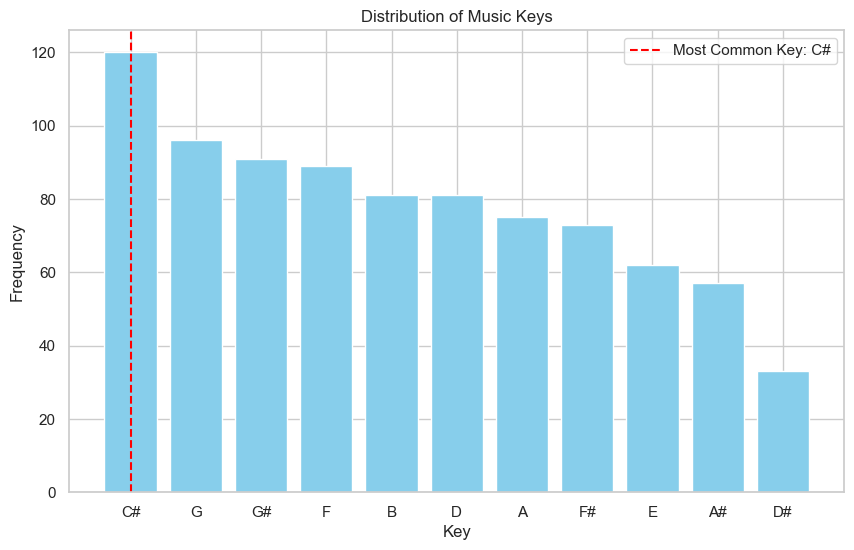

In [34]:
import matplotlib.pyplot as plt

# Menghitung distribusi kunci musik
key_distribution = df['key'].value_counts()

# Mendapatkan kunci musik yang paling umum
most_common_key = key_distribution.idxmax()

# Membuat histogram
plt.figure(figsize=(10, 6))
plt.bar(key_distribution.index, key_distribution.values, color='skyblue')
plt.xlabel('Key')
plt.ylabel('Frequency')
plt.title('Distribution of Music Keys')
plt.xticks(key_distribution.index)
plt.axvline(most_common_key, color='red', linestyle='--', label=f'Most Common Key: {most_common_key}')
plt.legend()
plt.show()

In [25]:

# Membuat tabel kontingensi untuk menghitung frekuensi kombinasi kunci dan mode
contingency_table = pd.crosstab(df['key'], df['mode'])

# Melihat korelasi antara kunci musik dan mode dengan uji chi-square (opsional)
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")


Chi-Square Statistic: 75.87123900339317
P-value: 3.219012684686981e-12


# Analisis Karakteristik Akustik

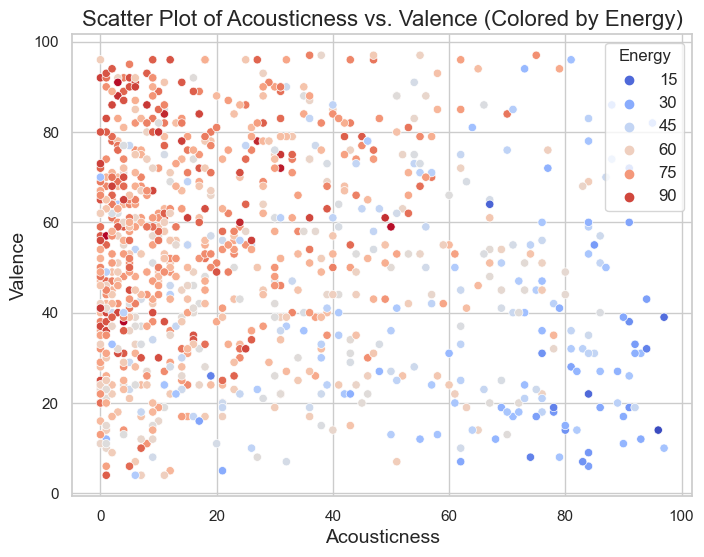

In [26]:
# Menciptakan plot sebaran (scatter plot) antara acousticness, valence, dan energy
plt.figure(figsize=(8, 6))
sns.scatterplot(x='acousticness', y='valence', hue='energy', data=df, palette='coolwarm')
plt.xlabel('Acousticness', fontsize=14)
plt.ylabel('Valence', fontsize=14)
plt.title('Scatter Plot of Acousticness vs. Valence (Colored by Energy)', fontsize=16)
plt.legend(title='Energy', fontsize=12, title_fontsize=12)
plt.show()

# Analisis Tingkat Speechiness

In [27]:


# Menampilkan lagu-lagu dengan tingkat bicara tinggi (speechiness >= 0.5, misalnya)
high_speechiness_songs = df[df['speechiness'] >= 0.5]
print(high_speechiness_songs)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

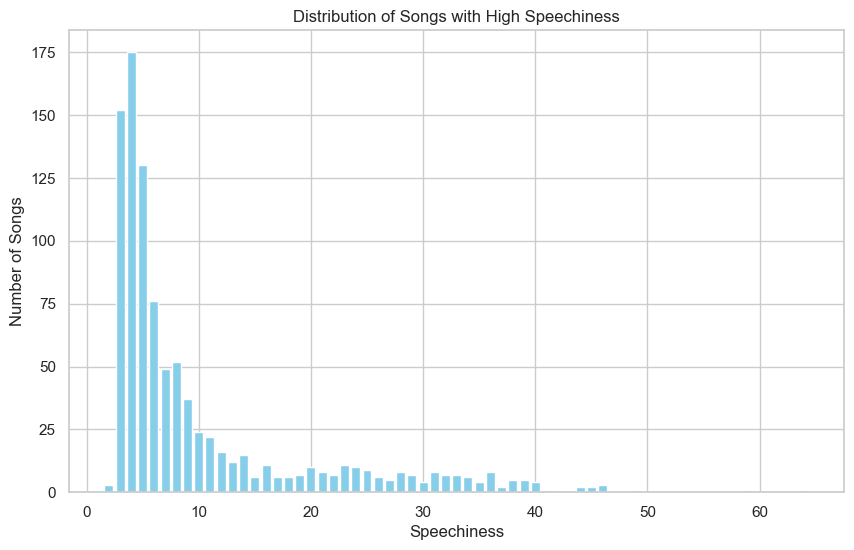

In [35]:
import matplotlib.pyplot as plt

# Filter lagu-lagu dengan speechiness >= 0.5
high_speechiness_songs = df[df['speechiness'] >= 0.5]

# Menghitung distribusi
speechiness_distribution = high_speechiness_songs['speechiness'].value_counts().sort_index()

# Membuat histogram
plt.figure(figsize=(10, 6))
plt.bar(speechiness_distribution.index, speechiness_distribution.values, color='skyblue')
plt.xlabel('Speechiness')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs with High Speechiness')
plt.show()


# Analisis Tren Berdasarkan Tahun Rilis:

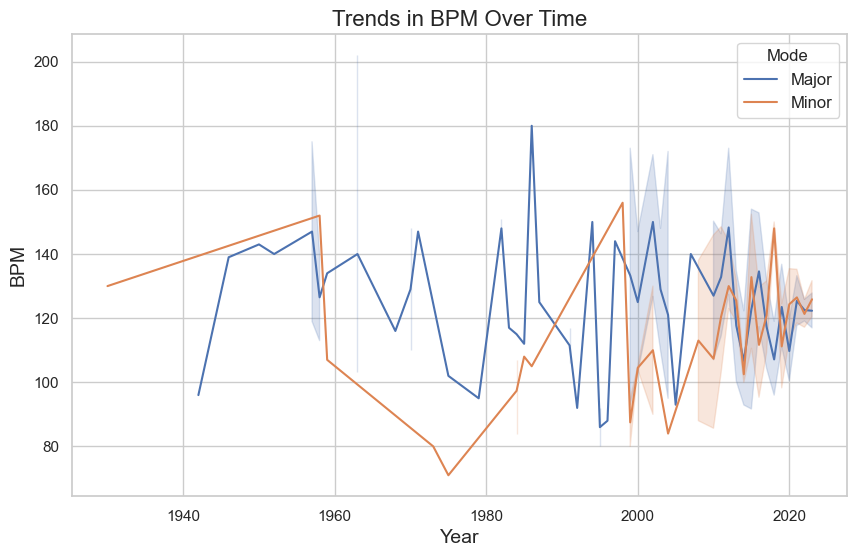

In [28]:

# Membuat plot tren BPM seiring waktu
plt.figure(figsize=(10, 6))
sns.lineplot(x='released_year', y='bpm', data=df, hue='mode', markers=True)
plt.xlabel('Year', fontsize=14)
plt.ylabel('BPM', fontsize=14)
plt.title('Trends in BPM Over Time', fontsize=16)
plt.legend(title='Mode', fontsize=12, title_fontsize=12)
plt.show()

# Analisis Sentimen Musik

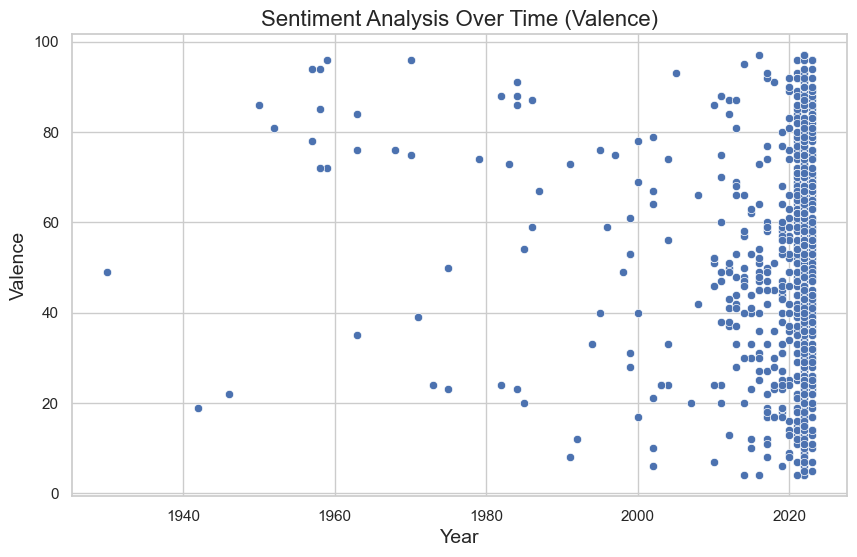

In [29]:


# Membuat plot sebaran (scatter plot) valence seiring waktu
plt.figure(figsize=(10, 6))
sns.scatterplot(x='released_year', y='valence', data=df)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Valence', fontsize=14)
plt.title('Sentiment Analysis Over Time (Valence)', fontsize=16)
plt.show()

# Analisis Perbandingan antara Layanan Streaming Musik (Spotify, Apple Music, Deezer, Shazam):

Total Songs in Spotify Playlists: 4955719
Total Songs in Spotify Charts: 11445


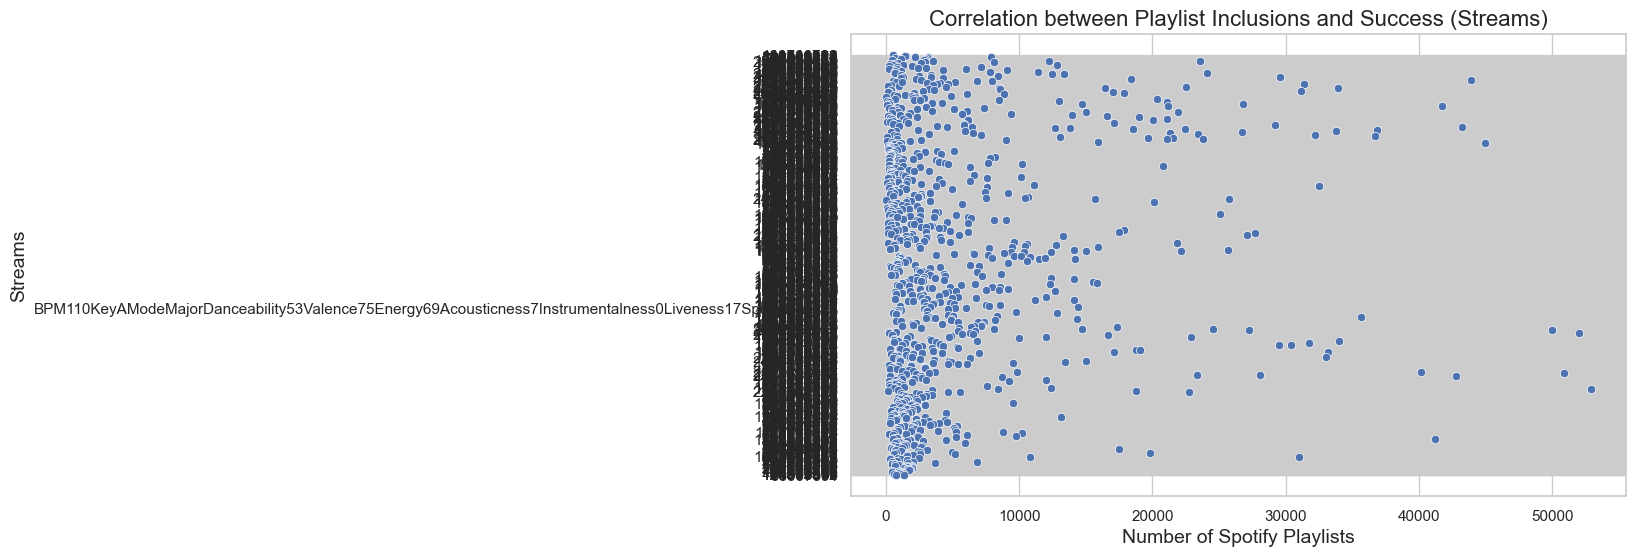

In [30]:
# Mengidentifikasi berapa banyak lagu dalam playlist dan grafik populer
playlist_counts = df['in_spotify_playlists'].sum()
chart_counts = df['in_spotify_charts'].sum()

print(f"Total Songs in Spotify Playlists: {playlist_counts}")
print(f"Total Songs in Spotify Charts: {chart_counts}")

# Membuat plot korelasi antara jumlah playlist dan kesuksesan (streams)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='in_spotify_playlists', y='streams', data=df)
plt.xlabel('Number of Spotify Playlists', fontsize=14)
plt.ylabel('Streams', fontsize=14)
plt.title('Correlation between Playlist Inclusions and Success (Streams)', fontsize=16)
plt.show()

# Analisis Interaksi antara Atribut Musik

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


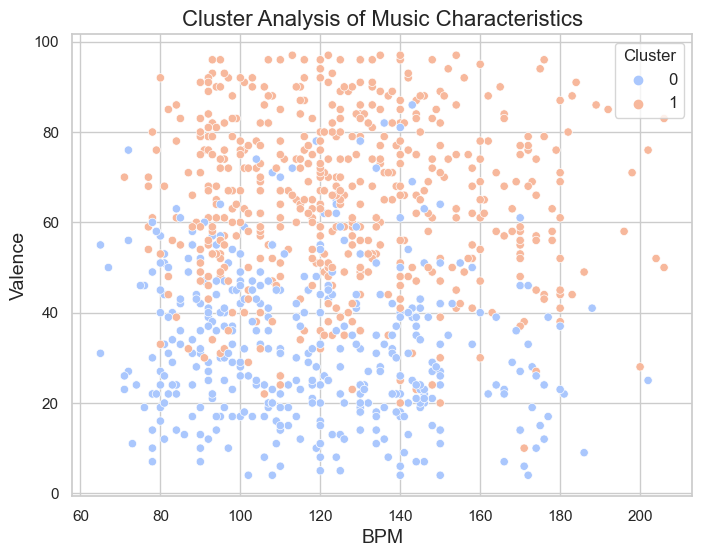

<Figure size 640x480 with 0 Axes>

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Memilih atribut yang akan digunakan untuk analisis
selected_attributes = df[['bpm', 'valence', 'energy']]

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_attributes)

# Melakukan analisis kluster dengan K-Means (misalnya, 2 kluster)
kmeans = KMeans(n_clusters=2, random_state=0)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Membuat plot kluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bpm', y='valence', hue='cluster', data=df, palette='coolwarm')
plt.xlabel('BPM', fontsize=14)
plt.ylabel('Valence', fontsize=14)
plt.title('Cluster Analysis of Music Characteristics', fontsize=16)
plt.legend(title='Cluster', fontsize=12, title_fontsize=12)
plt.show()
plt.savefig("plot1.jpg", format="jpg")


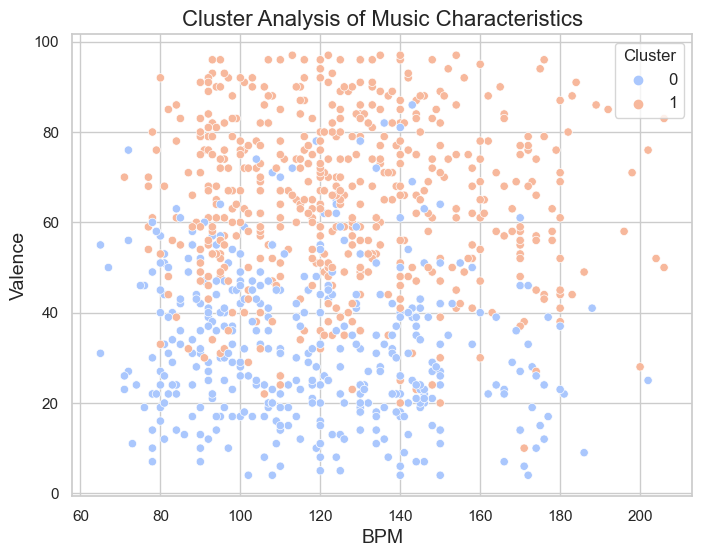

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (kode untuk membuat plot dan kluster)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='bpm', y='valence', hue='cluster', data=df, palette='coolwarm')
plt.xlabel('BPM', fontsize=14)
plt.ylabel('Valence', fontsize=14)
plt.title('Cluster Analysis of Music Characteristics', fontsize=16)
plt.legend(title='Cluster', fontsize=12, title_fontsize=12)

# Simpan plot sebagai JPG
plt.savefig("plot_cluster.jpg")
plt.show()


In [32]:
df.to_csv("spotify-2023-visualize2.csv", index=False)